
# stock market analysis

### Import necessary libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import math
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

### loading dataset

In [8]:
# Load the CSV file
df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [9]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort the data by date
df = df.sort_values('Date')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Extract the year from the 'Date' index
df['Year'] = df.index.year

In [10]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataframe:")
print(df.head())

First 5 rows of the dataframe:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   

            Year  
Date              
2012-01-03  2012  
2012-01-04  2012  
2012-01-05  2012  
2012-01-06  2012  
2012-01-09  2012  


In [5]:
# Display basic information about the dataframe
print("\nBasic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
 6   Year       2011 non-null   int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 117.8 KB
None


In [6]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume         Year  
count  2.011000e+03  2011.000000  
mean   5.949670e+07  2015.499751  
std    4.683856e+07     2.289795  
min    1.136200e+07  2012.000000  
25%    2.758565e+07  2014.000000  
50%    4.346900e+07  2015.000000  
75%    7.471030e+07  2017.000000  
max    3.765300e+08  2019.000000

# Check for missing values


In [7]:
print(df.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
dtype: int64


# outliers handiling

In [11]:
from sklearn.ensemble import IsolationForest

# Detecting outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
df['Outliers'] = iso_forest.fit_predict(df[['Close']])

# Counting the number of outliers
outliers_count = (df['Outliers'] == -1).sum()

# Printing the number of outliers
print(f'Number of outliers: {outliers_count}')


Number of outliers: 21


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


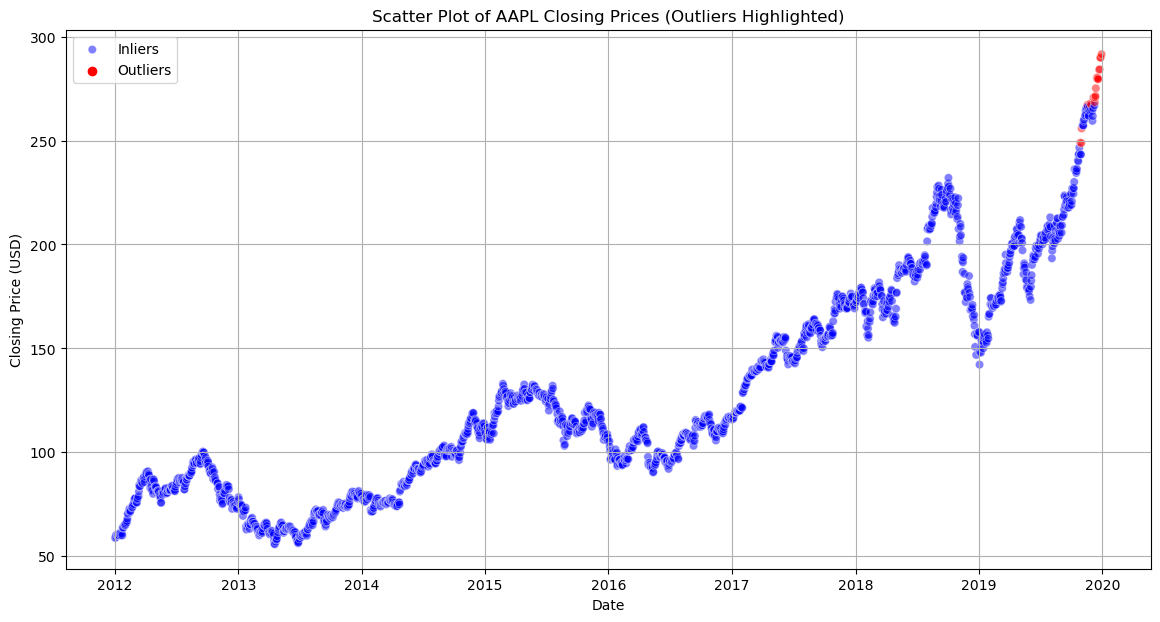

In [ ]:
# Visualizing outliers
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df.index, y=df['Close'], hue=df['Outliers'], palette={1: 'blue', -1: 'red'}, alpha=0.5)
plt.title('Scatter Plot of AAPL Closing Prices (Outliers Highlighted)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(['Inliers', 'Outliers'])
plt.grid(True)
plt.show()

In [12]:
# Removing outliers
df = df[df['Outliers'] == 1]
df.drop(columns=['Outliers'], inplace=True)

<ipython-input-12-f77b45fdd7a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Outliers'], inplace=True)


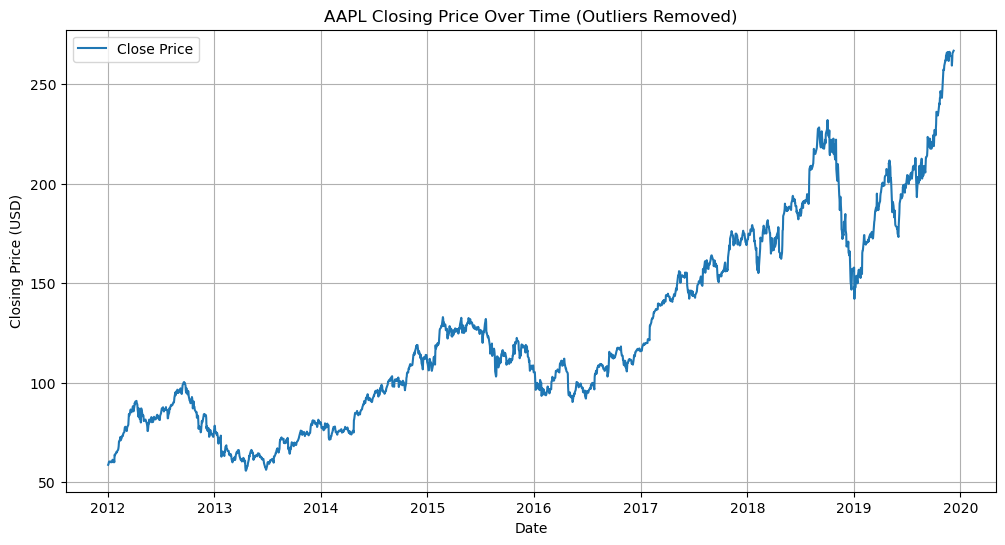

In [ ]:
# Verify if outliers are removed
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('AAPL Closing Price Over Time (Outliers Removed)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# Univariate Analysis

 examination of a single variable in isolation

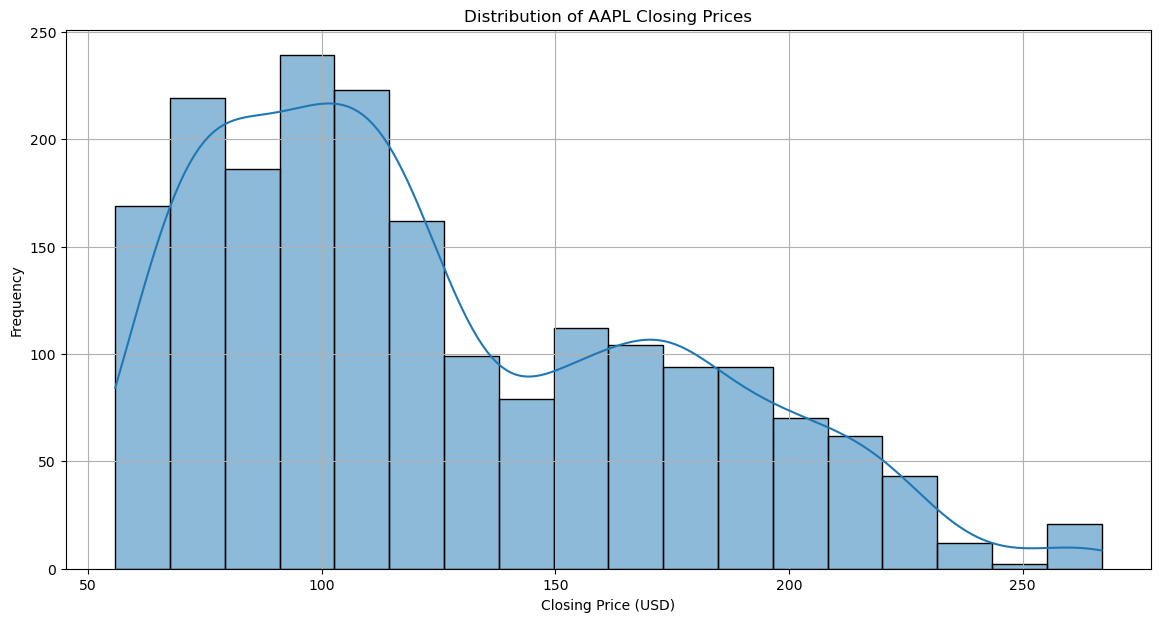

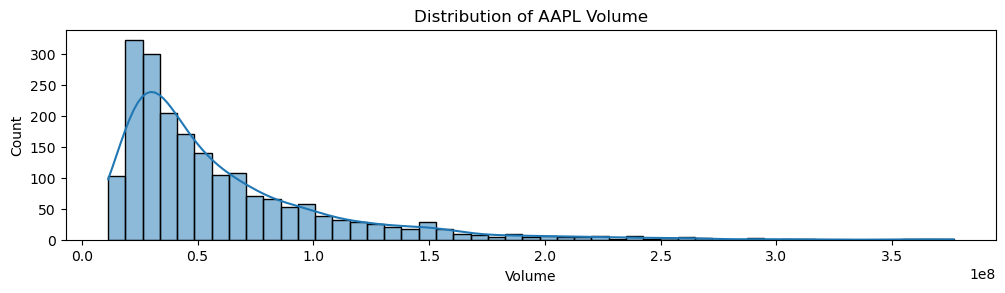

In [ ]:
# Distribution of closing prices
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of AAPL Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
sns.histplot(df['Volume'], kde=True)
plt.title('Distribution of AAPL Volume')
plt.show()

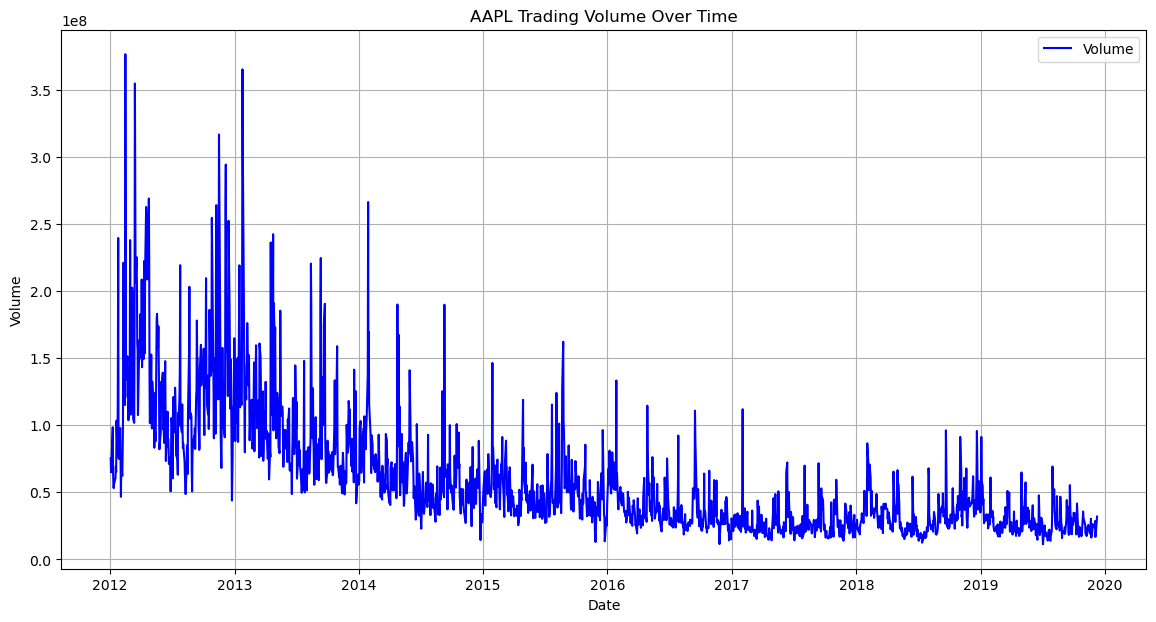

In [ ]:
# Volume over time
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume', color='blue')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


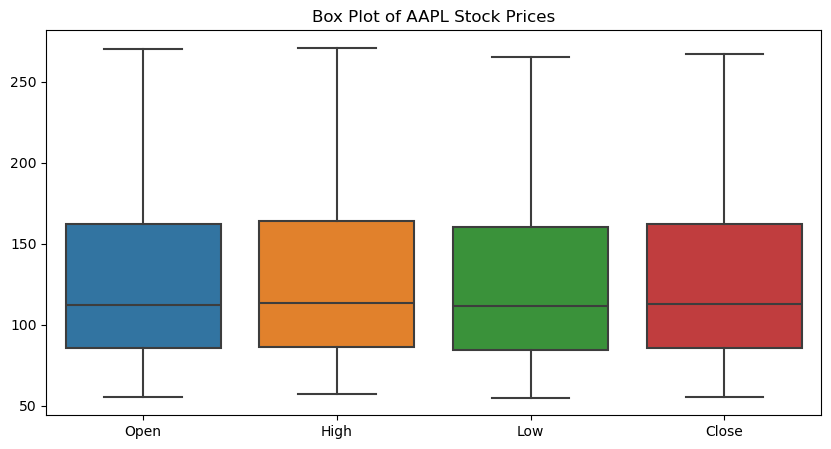

In [ ]:
# Box plot to identify outliers

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of AAPL Stock Prices')
plt.show()

# Bivariate Analysis

    examining the relationship between two variables

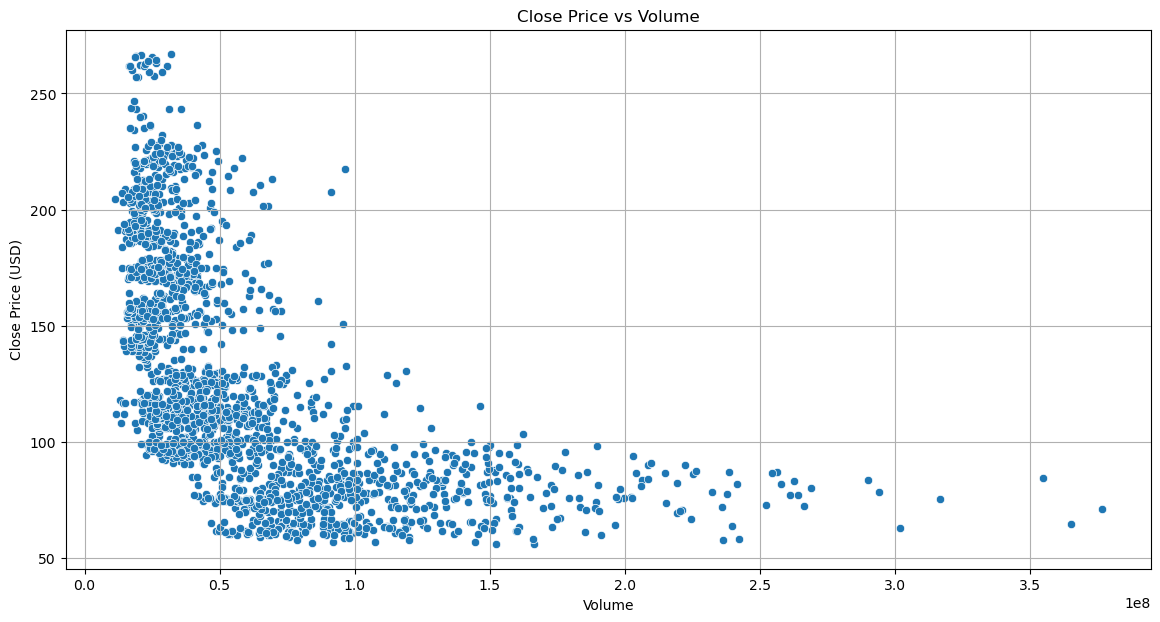

In [ ]:
# Close vs Volume
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title('Close Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()


# Multivariate Analysis(corelation matrix)

examining the relationships between multiple variables

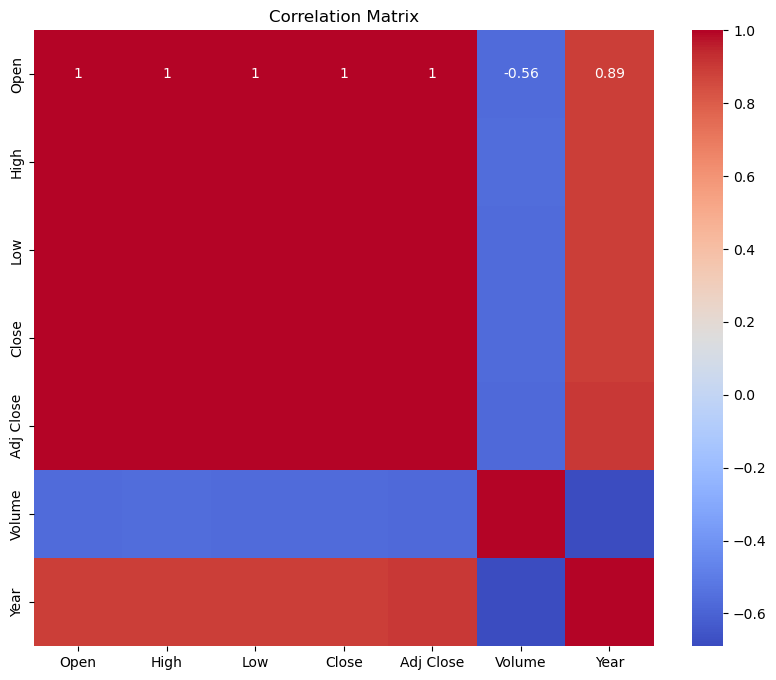

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Feature Engineering

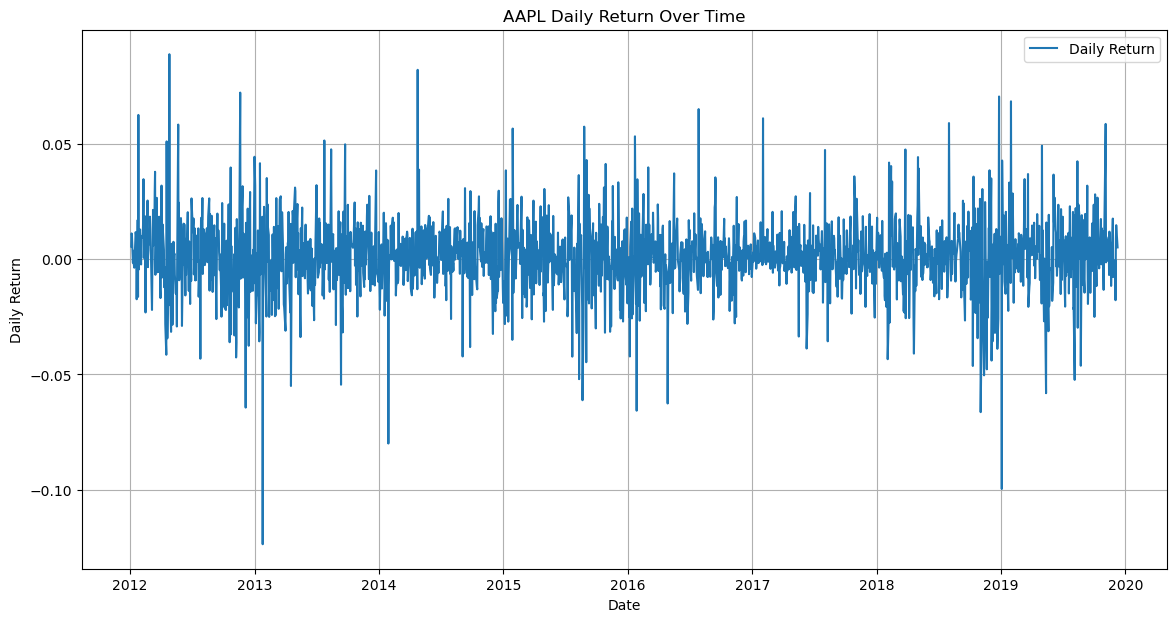

In [ ]:
df['Daily Return'] = df['Close'].pct_change()
df.dropna(inplace=True)

# Daily Return over time
plt.figure(figsize=(14, 7))
plt.plot(df['Daily Return'], label='Daily Return')
plt.title('AAPL Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


# Some  visuvalizations

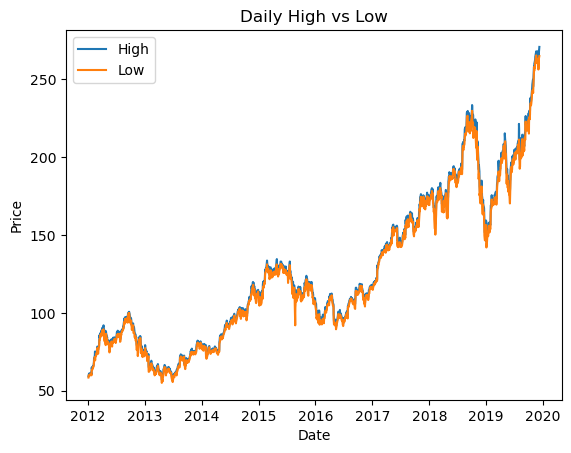

In [ ]:
# @title Daily High vs Low

import matplotlib.pyplot as plt
plt.plot(df.index, df['High'], label='High') # Use df.index instead of df['Date']
plt.plot(df.index, df['Low'], label='Low') # Use df.index instead of df['Date']
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily High vs Low')
plt.legend()

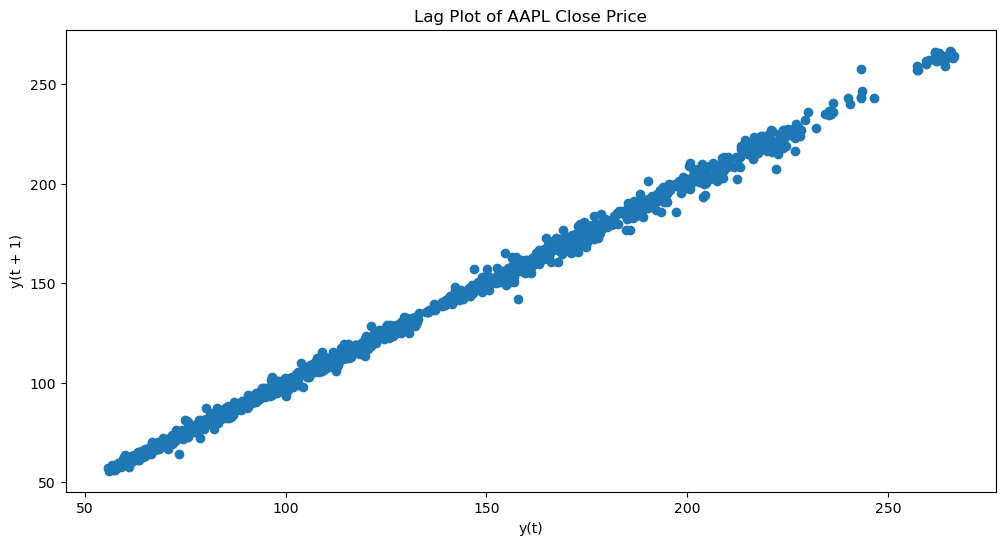

In [ ]:
from pandas.plotting import lag_plot, autocorrelation_plot

# Lag plot
plt.figure(figsize=(12, 6))
lag_plot(df['Close'])
plt.title('Lag Plot of AAPL Close Price')
plt.show()

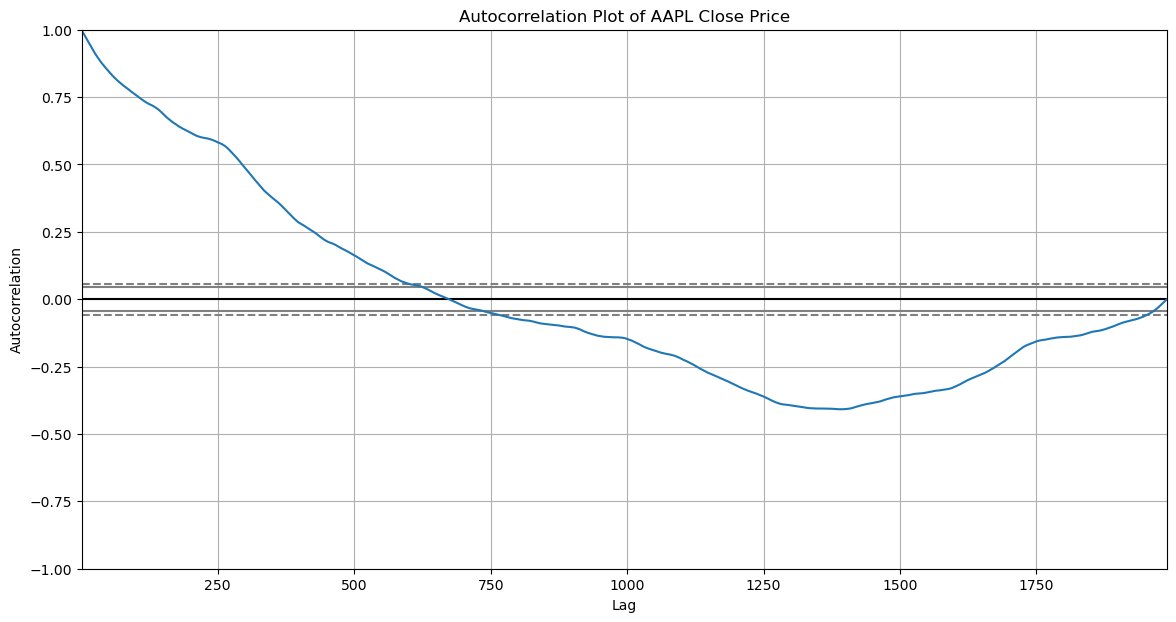

In [ ]:
# Autocorrelation plot
plt.figure(figsize=(14, 7))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot of AAPL Close Price')
plt.show()

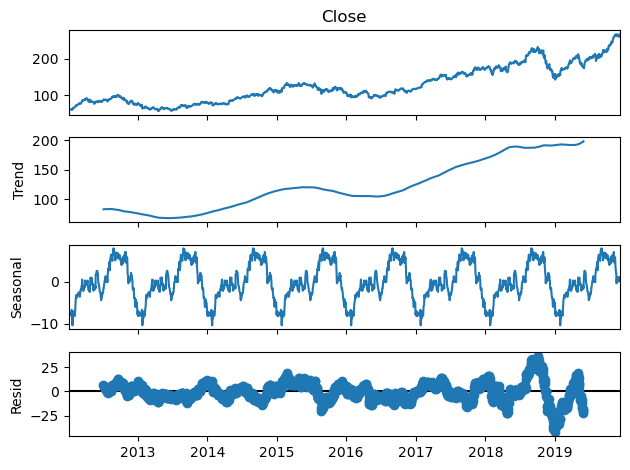

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 252 trading days in a year
result = seasonal_decompose(df['Close'], model='additive', period=252)

# Plot the decomposition
result.plot()
plt.show()

# Adf and kpss tests

In [13]:
#  Perform the ADF and KPSS tests on the raw time series data.

from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
adf_result = adfuller(df['Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# KPSS Test
kpss_result = kpss(df['Close'])
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])


ADF Statistic: 0.5596668506047004
p-value: 0.9865781236339164
KPSS Statistic: 5.97078783280746
p-value: 0.01


<ipython-input-13-9c8803af1333>:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['Close'])


In [14]:
# Apply differencing to achieve stationarity
differenced_series = df['Close'].diff().dropna()

# Recheck stationarity
adf_result = adfuller(differenced_series)
kpss_result = kpss(differenced_series)


<ipython-input-14-84a172573893>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(differenced_series)


#  Data standrdization & Data partition

In [15]:
# Split the data into training and testing sets based on the year
train_data = df[df['Year'] < 2019]
test_data = df[df['Year'] == 2019]

# Use only the 'Close' prices for forecasting
train_close_prices = train_data['Close'].values.reshape(-1, 1)
test_close_prices = test_data['Close'].values.reshape(-1, 1)

In [16]:
# Standardize the data
scaler = StandardScaler()
train_scaled_close_prices = scaler.fit_transform(train_close_prices)
test_scaled_close_prices = scaler.transform(test_close_prices)

In [17]:
# Recheck stationarity with ADF and KPSS tests after transformation

# Apply differencing to achieve stationarity
differenced_series = df['Close'].diff().dropna()

# Recheck stationarity
adf_result = adfuller(differenced_series)
kpss_result = kpss(differenced_series)

# Print the ADF and KPSS test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])


ADF Statistic: -13.75928118392516
p-value: 1.0156798689636716e-25
KPSS Statistic: 0.24210390458807676
p-value: 0.1


<ipython-input-17-7adac3cdec2e>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(differenced_series)


In [18]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, Y_train = create_dataset(train_scaled_close_prices, time_step)
X_test, Y_test = create_dataset(test_scaled_close_prices, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# LSTM model


In [19]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

# Calculate R-squared
train_r2 = r2_score(Y_train[0], train_predict[:,0])
test_r2 = r2_score(Y_test[0], test_predict[:,0])

print(f'Train Score: {train_score} RMSE')
print(f'Test Score: {test_score} RMSE')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

5/5 [==============================] - 0s 20ms/step
Train Score: 4.005078057732966 RMSE
Test Score: 5.863188020295062 RMSE
Train R²: 0.9904608337828202
Test R²: 0.9376118592015867


In [22]:

#
# Predict the next 30 days
def predict_next_days(model, data, scaler, time_step=100, days_to_predict=30):
    # Prepare the data to start prediction
    last_data_points = data[-time_step:].reshape(1, time_step, 1)  # Reshape for model input
    predictions = []

    for _ in range(days_to_predict):
        next_pred = model.predict(last_data_points)
        predictions.append(next_pred[0, 0])

        # Update the last_data_points by removing the first element and adding the new prediction
        next_pred_reshaped = next_pred.reshape(1, 1, 1)  # Reshape next_pred to be [samples, time steps, features]
        last_data_points = np.append(last_data_points[:, 1:, :], next_pred_reshaped, axis=1)

    # Inverse transform the predictions to get actual values
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)

    return predictions

days_to_predict = 30
next_30_days_predictions = predict_next_days(model, test_scaled_close_prices, scaler, time_step, days_to_predict)

# Print the predicted values for the next 30 days
print("Predictions for the next 30 days:")
for i, pred in enumerate(next_30_days_predictions, 1):
    print(f"Day {i}: {pred[0]}")

1/1 [==============================] - 0s 28ms/step
Predictions for the next 30 days:
Day 1: 256.1569519042969
Day 2: 255.2490997314453
Day 3: 254.20848083496094
Day 4: 253.12591552734375
Day 5: 252.05772399902344
Day 6: 251.03500366210938
Day 7: 250.0726318359375
Day 8: 249.1766357421875
Day 9: 248.34774780273438
Day 10: 247.5840301513672
Day 11: 246.8820343017578
Day 12: 246.23785400390625
Day 13: 245.64720153808594
Day 14: 245.1059112548828
Day 15: 244.61004638671875
Day 16: 244.15579223632812
Day 17: 243.73971557617188
Day 18: 243.35855102539062
Day 19: 243.0093536376953
Day 20: 242.68943786621094
Day 21: 242.39627075195312
Day 22: 242.1276092529297
Day 23: 241.88137817382812
Day 24: 241.65567016601562
Day 25: 241.4487762451172
Day 26: 241.25909423828125
Day 27: 241.0851593017578
Day 28: 240.92567443847656
Day 29: 240.7794189453125
Day 30: 240.6453094482422


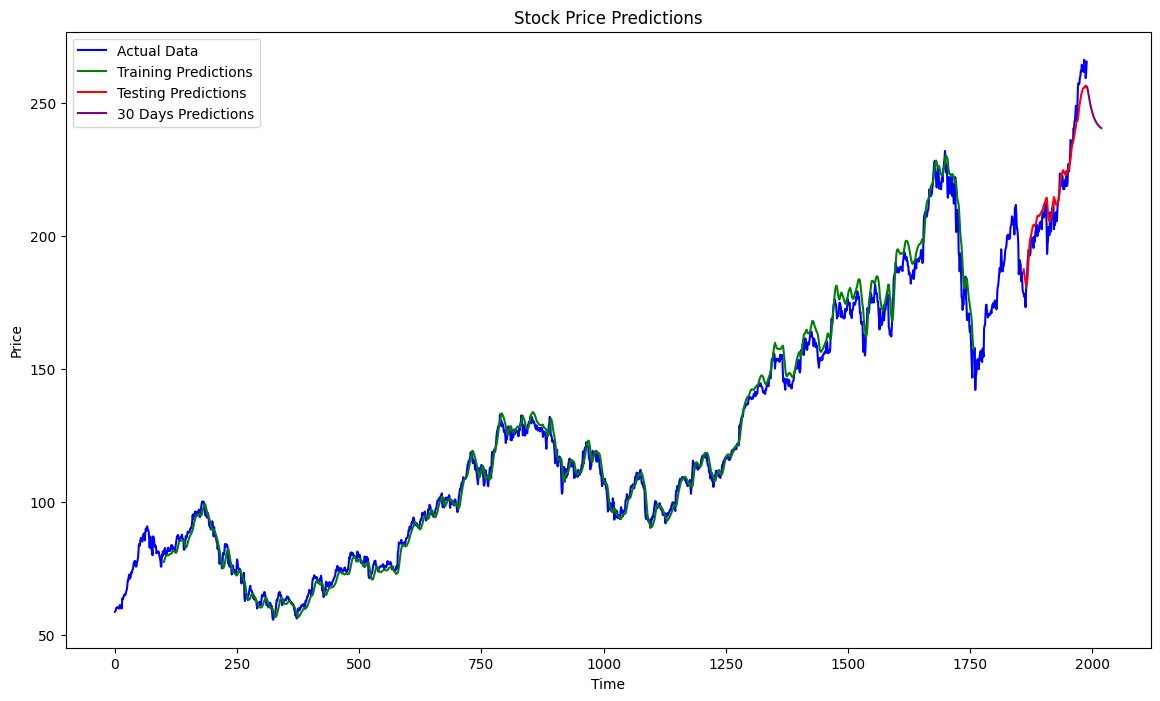

In [23]:
import matplotlib.pyplot as plt

# Plot the data
def plot_predictions(actual, train_predict, test_predict, future_predictions):
    plt.figure(figsize=(14, 8))

    # Plot actual values
    plt.plot(actual, label='Actual Data', color='blue')

    # Plot training predictions
    train_size = len(train_predict)
    train_plot = np.empty_like(actual)
    train_plot[:, :] = np.nan
    train_plot[time_step:train_size+time_step] = train_predict
    plt.plot(train_plot, label='Training Predictions', color='green')

    # Plot testing predictions
    test_size = len(test_predict)
    test_plot = np.empty_like(actual)
    test_plot[:, :] = np.nan
    test_plot[train_size+(time_step*2)+1:len(actual)-1] = test_predict
    plt.plot(test_plot, label='Testing Predictions', color='red')

    # Plot future predictions
    future_plot = np.empty_like(actual)
    future_plot[:, :] = np.nan
    future_plot[-days_to_predict:] = future_predictions
    plt.plot(range(len(actual), len(actual) + days_to_predict), future_predictions, label='30 Days Predictions', color='purple')

    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Stock Price Predictions')
    plt.show()

# Combine the training and test sets for plotting actual values
all_data = np.concatenate((train_scaled_close_prices, test_scaled_close_prices), axis=0)
actual = scaler.inverse_transform(all_data)

plot_predictions(actual, train_predict, test_predict, next_30_days_predictions)

# arima model

In [25]:

import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the 'Close' column is a Series with a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    # Attempt to convert the index to DatetimeIndex
    df.index = pd.to_datetime(df.index)

# Define the model order
p = 2
d = 1
q = 1

# Create the ARIMA model
model = ARIMA(df['Close'], order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Get the available prediction start and end dates
start_date = df.index.min()
end_date = df.index.max()
print(f"Available prediction range: {start_date} to {end_date}")

# Make predictions within the available range
predictions = model_fit.predict(start=start_date, end=end_date)

# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(df['Close'][start_date:end_date], predictions))

# Calculate R-squared
r2 = r2_score(df['Close'][start_date:end_date], predictions)

# Print the results
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Available prediction range: 2012-01-03 00:00:00 to 2019-12-05 00:00:00
RMSE: 2.4918234331333564
R²: 0.9973526787718372


In [29]:

# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecast
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')


# Print the forecasted values for the next 30 days
print("Forecasted values for the next 30 days:")
for date, value in zip(forecast_dates, forecast):
    print(f"{date}: {value}")

Forecasted values for the next 30 days:
2019-12-06 00:00:00: 265.52724722280806
2019-12-07 00:00:00: 265.2999273483909
2019-12-08 00:00:00: 265.2721210661452
2019-12-09 00:00:00: 265.2813832898626
2019-12-10 00:00:00: 265.28423375300264
2019-12-11 00:00:00: 265.2840892938156
2019-12-12 00:00:00: 265.2839062696897
2019-12-13 00:00:00: 265.2838897297457
2019-12-14 00:00:00: 265.28389798025364
2019-12-15 00:00:00: 265.28390004754544
2019-12-16 00:00:00: 265.28389985487604
2019-12-17 00:00:00: 265.28389971021676
2019-12-18 00:00:00: 265.28389970164415
2019-12-19 00:00:00: 265.28389970877555
2019-12-20 00:00:00: 265.28389971023427
2019-12-21 00:00:00: 265.2838997100232
2019-12-22 00:00:00: 265.28389970991094
2019-12-23 00:00:00: 265.2838997099078
2019-12-24 00:00:00: 265.28389970991384
2019-12-25 00:00:00: 265.2838997099148
2019-12-26 00:00:00: 265.2838997099146
2019-12-27 00:00:00: 265.28389970991446
2019-12-28 00:00:00: 265.28389970991446
2019-12-29 00:00:00: 265.28389970991446
2019-12-30

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


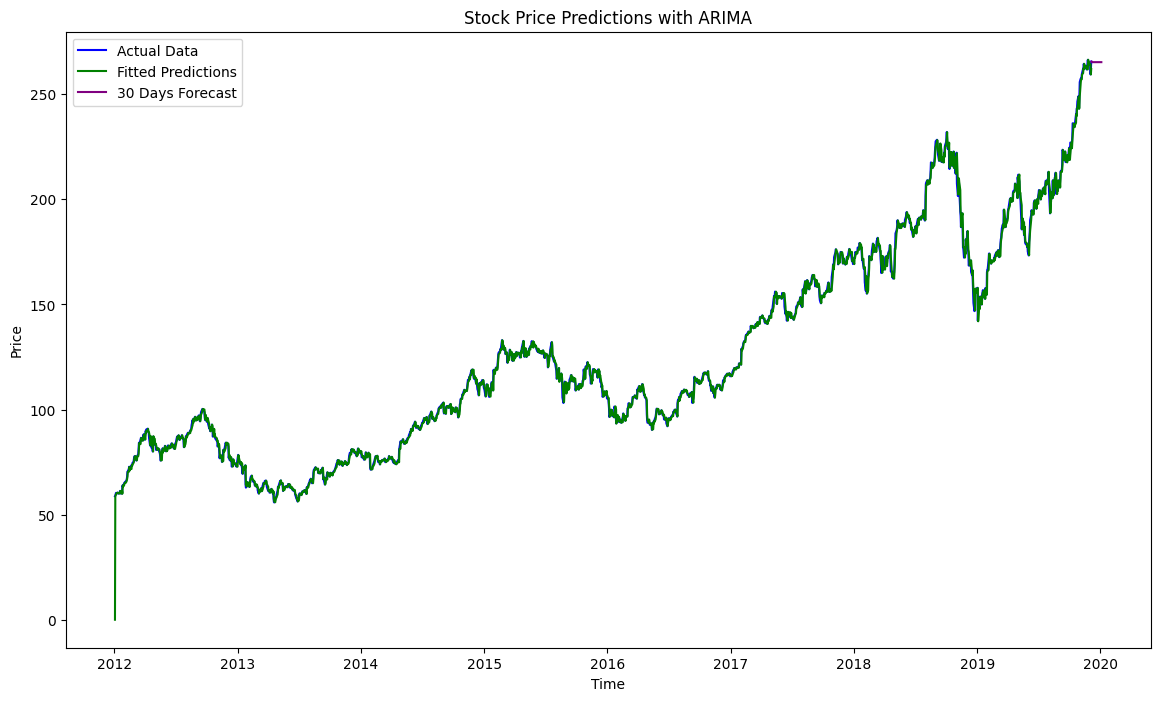

In [30]:

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Actual Data', color='blue')
plt.plot(predictions.index, predictions, label='Fitted Predictions', color='green')
plt.plot(forecast_dates, forecast, label='30 Days Forecast', color='purple')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Predictions with ARIMA')
plt.show()

# Gated Recurrent Unit (GRU)

In [17]:

from keras.layers import GRU

# Create the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train[0], batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train)
Y_test = scaler.inverse_transform(Y_test)

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

# Calculate R-squared
train_r2 = r2_score(Y_train[0], train_predict[:,0])
test_r2 = r2_score(Y_test[0], test_predict[:,0])

print(f'Train Score: {train_score} RMSE')
print(f'Test Score: {test_score} RMSE')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


5/5 [==============================] - 0s 23ms/step
Train Score: 2473.675962567261 RMSE
Test Score: 6364.16352445738 RMSE
Train R²: -1.163666144853087
Test R²: -26.458218328548547


#   cnn model


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Create the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train[0], epochs=10, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train)
Y_test = scaler.inverse_transform(Y_test)

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

# Calculate R-squared
train_r2 = r2_score(Y_train[0], train_predict[:,0])
test_r2 = r2_score(Y_test[0], test_predict[:,0])

print(f'Train Score: {train_score} RMSE')
print(f'Test Score: {test_score} RMSE')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 26269858.0000
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12422281.0000
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2574549.0000
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1005320.7500
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 412814.9062
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 359479.5938
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 283372.4062
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 299447.0000
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 228204.7969
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 236286.6875
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Train Score: 19335.494840265204 RMSE
Test Score: 27418.48444896289 RMSE
Train R²: 0.9213269597178926
Test R²: 0.5401970508852643


# Bidirectional LSTM (BiLSTM)

In [ ]:

from keras.layers import Bidirectional

# Create the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(time_step, 1)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train[0], batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train)
Y_test = scaler.inverse_transform(Y_test)

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

# Calculate R-squared
train_r2 = r2_score(Y_train[0], train_predict[:,0])
test_r2 = r2_score(Y_test[0], test_predict[:,0])

print(f'Train Score: {train_score} RMSE')
print(f'Test Score: {test_score} RMSE')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1658/1658 ━━━━━━━━━━━━━━━━━━━━ 61s 34ms/step - loss: 45434793984.0000
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Train Score: 8757768.231163299 RMSE
Test Score: 15299003.487922141 RMSE
Train R²: -8.601500722036164
Test R²: -84.16242526837488


# Temporal Convolutional Networks (TCN)

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import Bidirectional
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

# Define the TCN model
model = Sequential()

model.add(layers.InputLayer(input_shape=(time_step, 1)))

model.add(layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train[0], epochs=5, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train)
Y_test = scaler.inverse_transform(Y_test)

# Calculate root mean squared error
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

# Calculate R-squared
train_r2 = r2_score(Y_train[0], train_predict[:,0])
test_r2 = r2_score(Y_test[0], test_predict[:,0])

print(f'Train Score: {train_score} RMSE')
print(f'Test Score: {test_score} RMSE')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 76486983811072.0000
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 76427810570240.0000
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 75626455236608.0000
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 76184775819264.0000
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 76050155438080.0000
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Train Score: 358473444.04937893 RMSE
Test Score: 626211356.9564492 RMSE
Train R²: -8.569804650661666
Test R²: -83.87904513888272
